In [24]:
import pickle


with open(r'cnn_lstm1_p2t_epoch_25_length_4_opt_1_mulopt_1_flip_0_crop_1_batch_100_train1_9990_train2_9983_val1_9554_val2_8163_test1_9433_crop_1.pkl', 'rb') as f:
    pred_tool_cl = pickle.load(f)
    
with open (r'cnn_lstm1_p2t_epoch_25_length_4_opt_1_mulopt_1_flip_0_crop_1_batch_100_train1_9990_train2_9983_val1_9554_val2_8163_test2_7554_crop_1.pkl', 'rb') as f:
    pred_phase_cl = pickle.load(f)
    
with open(r'cnn_lstm_epoch_25_length_4_opt_1_mulopt_1_flip_0_crop_1_batch_100_train1_9989_train2_9970_val1_9543_val2_8197_test1_9442_crop_1.pkl', 'rb') as f:
    pred_tool_without_cl = pickle.load(f)
    
with open (r'cnn_lstm_epoch_25_length_4_opt_1_mulopt_1_flip_0_crop_1_batch_100_train1_9989_train2_9970_val1_9543_val2_8197_test2_7720_crop_1.pkl', 'rb') as f:
    pred_phase_without_cl = pickle.load(f)
    
    
with open(r'lstm_epoch_25_length_4_opt_1_mulopt_1_flip_0_crop_1_batch_100_train_9949_val_7633_test_7297_crop_1.pkl', 'rb') as f:
    pred_phase_singleNet = pickle.load(f)
    
with open (r'cnn_lstm_epoch_25_length_2_opt_1_mulopt_1_flip_0_crop_1_batch_100_train1_9980_val1_0_test1_9408_crop_1.pkl', 'rb') as f:
    pred_tool_singleNet = pickle.load(f)
    
with open(r'train_val_test_paths_labels.pkl', 'rb') as f:
    label = pickle.load(f)

In [62]:
pred_phase = []
for tensor in pred_phase_singleNet:
    pred_phase.append(tensor.item())

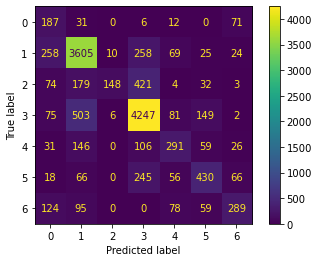

In [63]:
# confusion matrix for phase with correlation loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
phase_value = []
for element in test_labels[:12665]:
    phase_value.append(element[-1])
cm = confusion_matrix(phase_value, pred_phase, labels=[0,1, 2, 3, 4,5,6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1, 2, 3, 4,5,6])
disp.plot() 

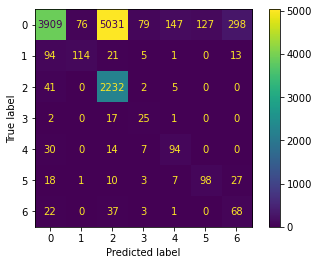

In [74]:
tool_value = [sublist[:7] for sublist in test_labels]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
class_prediction_compi = np.argmax(pred_tool_without_cl, axis=1)
tool_compi = np.argmax(tool_value, axis = 1)

cm = confusion_matrix(tool_compi, class_prediction_compi, labels=[0,1, 2, 3, 4,5,6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1, 2, 3, 4,5,6])
disp.plot()

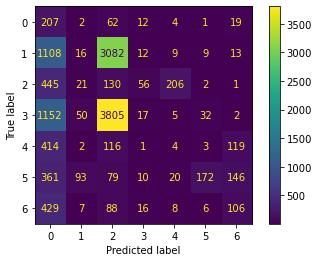

In [33]:
# confusion matrix for phase without correlation loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
class_prediction_compi = np.argmax(np.array(pred_phase_without_cl), axis= 1)
phase_value = [sublist[-1] for sublist in test_labels]
cm = confusion_matrix(np.array(phase_value), class_prediction_compi, labels=[0,1, 2, 3, 4,5,6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1, 2, 3, 4,5,6])
disp.plot() 